## **Dataset: E-commerce in UK** 

Source: https://www.kaggle.com/carrie1/ecommerce-data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In this notebook, we do basic analysis extracting from the data.

# 1. Loading dataset

## **1a. Loading dataset from Kaggle**

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oanhkieunguyen","key":"f148645a5d84a24bc9038f818dc58910"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d carrie1/ecommerce-data


 69% 5.00M/7.20M [00:00<00:00, 28.7MB/s]
100% 7.20M/7.20M [00:00<00:00, 33.8MB/s]


In [ ]:
! unzip ecommerce-data

Archive:  ecommerce-data.zip
  inflating: data.csv                


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
color = sns.color_palette()

In [ ]:
df = pd.read_csv('/content/data.csv', engine = 'python', encoding='iso-8859-1')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **1b. Loading data from Google Drive** (optional)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
color = sns.color_palette()

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_EC in UK.csv',engine = 'python')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 2. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#InvoiceDate has object datatype, need to move to datetime
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
# Description convert to lowercase
df['Description'] = df.Description.str.lower()

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We can see that Description & CustomerID have some null value 

In [ ]:
df.isnull().sum()
# true = 1, false = 0 -> sum to see total rows of null

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Na in Description & CustomerID is not useful so we remove these rows


In [ ]:
df_new = df.dropna()

In [ ]:
df_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We go through basic describe

In [ ]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity & UnitPrice have negative value which is less than 0

In [ ]:
# Total rows have negative quantity
np.sum(df_new['Quantity']<0)

8905

In [ ]:
df_negative = df_new[df_new['Quantity']<0]
df_negative.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,pack of 12 red retrospot tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,chick grey hot water bottle,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,plasters in tin vintage paisley,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,plasters in tin skulls,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,jam making set with jars,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


Maybe Invoice beginning with C (cancel) makes negative quantity

In [ ]:
df_negative.count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [ ]:
C_order = df_new[df_new['InvoiceNo'].str.startswith('C')]
C_order.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,pack of 12 red retrospot tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,chick grey hot water bottle,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,plasters in tin vintage paisley,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,plasters in tin skulls,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,jam making set with jars,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [ ]:
C_order.count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

All transactions with negative value are Canceled orders

In [ ]:
print('The percentage of canceled orders is: {}%'.format(round(C_order.shape[0]/df_new.shape[0]*100,2)))

The percentage of canceled orders is: 2.19%


Now we will drop canceled order rows

In [ ]:
df_new = df_new[df_new['Quantity']>0]
df_new.sort_values(by='StockCode', ascending= False)
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
df_new['Amount']=df_new['Quantity']*df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Create columns for day, month, year
df_new['YearMonth'] = df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month)
df_new['Year'] = df_new['InvoiceDate'].dt.year
df_new['Month'] = df_new['InvoiceDate'].dt.month
df_new['Day'] = df_new['InvoiceDate'].dt.dayofweek

In [ ]:
# Reorder columns
df_new = df_new[['InvoiceNo','StockCode','CustomerID','Description','Quantity','UnitPrice','Amount','InvoiceDate','YearMonth','Year','Month','Day','Country']]
df_new.head()

,InvoiceNo,StockCode,CustomerID,Description,Quantity,UnitPrice,Amount,InvoiceDate,YearMonth,Year,Month,Day,Country
0,536365,85123A,17850.0,white hanging heart t-light holder,6,2.55,15.30,2010-12-01 08:26:00,201012,2010,12,2,United Kingdom
1,536365,71053,17850.0,white metal lantern,6,3.39,20.34,2010-12-01 08:26:00,201012,2010,12,2,United Kingdom
2,536365,84406B,17850.0,cream cupid hearts coat hanger,8,2.75,22.00,2010-12-01 08:26:00,201012,2010,12,2,United Kingdom
3,536365,84029G,17850.0,knitted union flag hot water bottle,6,3.39,20.34,2010-12-01 08:26:00,201012,2010,12,2,United Kingdom
4,536365,84029E,17850.0,red woolly hottie white heart.,6,3.39,20.34,2010-12-01 08:26:00,201012,2010,12,2,United Kingdom


# 3. Basic Analysis

In [ ]:
# CustomerID chuyển sang Str 
df_new['CustomerID'] = df_new.CustomerID.astype('str')

In [ ]:
df_new.describe(include='object')

,InvoiceNo,StockCode,CustomerID,Description,Country
count,397924,397924,397924,397924,397924
unique,18536,3665,4339,3877,37
top,576339,85123A,17841.0,white hanging heart t-light holder,United Kingdom
freq,542,2035,7847,2028,354345


We clearly see that United Kingdom is the super largest market which has 353,345/397,924 transactions.

In [ ]:
df_new.describe()

,Quantity,UnitPrice,Amount,YearMonth,Year,Month,Day
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749,201101.038417,2010.934259,7.612537,2.614555
std,180.420210,22.096788,309.055588,23.836517,0.247829,3.416527,1.928274
min,1.000000,0.000000,0.000000,201012.000000,2010.000000,1.000000,0.000000
25%,2.000000,1.250000,4.680000,201104.000000,2011.000000,5.000000,1.000000
50%,6.000000,1.950000,11.800000,201107.000000,2011.000000,8.000000,2.000000
75%,12.000000,3.750000,19.800000,201110.000000,2011.000000,11.000000,4.000000
max,80995.000000,8142.750000,168469.600000,201112.000000,2011.000000,12.000000,6.000000


## **Analysis for Unit Price**

In [ ]:
df_new.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

There are some orders having UnitPrice = 0 (Free orders)


In [ ]:
df_free = df_new[df_new['UnitPrice']==0]
df_free.head()

,InvoiceNo,StockCode,CustomerID,Description,Quantity,UnitPrice,Amount,InvoiceDate,YearMonth,Year,Month,Day,Country
9302,537197,22841,12647.0,round cake tin vintage green,1,0.0,0.0,2010-12-05 14:02:00,201012,2010,12,6,Germany
33576,539263,22580,16560.0,advent calendar gingham sack,4,0.0,0.0,2010-12-16 14:36:00,201012,2010,12,3,United Kingdom
40089,539722,22423,14911.0,regency cakestand 3 tier,10,0.0,0.0,2010-12-21 13:45:00,201012,2010,12,1,EIRE
47068,540372,22090,13081.0,paper bunting retrospot,24,0.0,0.0,2011-01-06 16:41:00,201101,2011,1,3,United Kingdom
47070,540372,22553,13081.0,plasters in tin skulls,24,0.0,0.0,2011-01-06 16:41:00,201101,2011,1,3,United Kingdom


In [ ]:
print('The percentage of invoice including free items is: {}%'.format(round(df_free.shape[0]/df_new.shape[0]*100,2)))

The percentage of invoice including free items is: 0.01%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


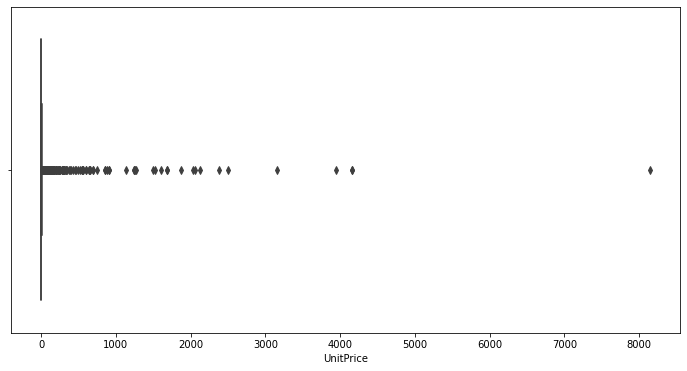

In [ ]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.UnitPrice)
plt.show()

It looks like the majority of products has UnitPrice less than 10 (mostly 1.25 - 3.75), so we will use 10 as threshold to go through the chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


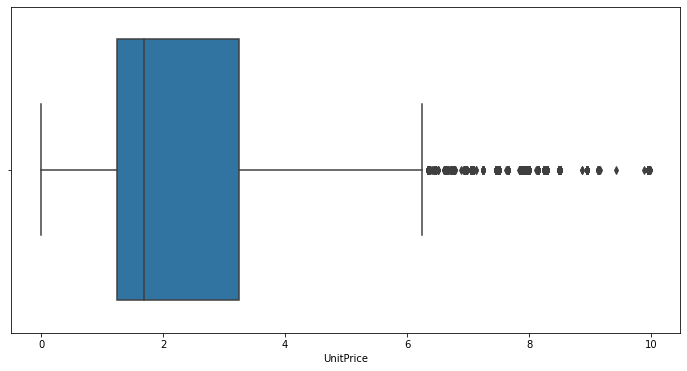

In [ ]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new[df_new['UnitPrice']< 10].UnitPrice)
plt.show()

Too many outliers need to be removed

In [ ]:
from scipy.stats import iqr 
print(iqr(df_new['UnitPrice']))
q1 = 1.25
q3 = 3.75
iqr = q3 - q1
L_fence = q1 - 1.5*iqr
U_fence = q3 + 1.5*iqr
print(L_fence)
print(U_fence)

2.5
-2.5
7.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


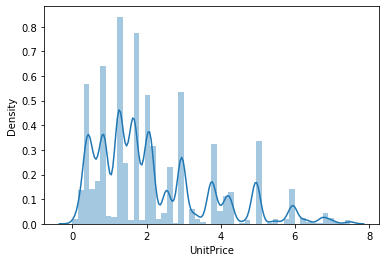

In [ ]:
df_no_out = df_new[(df_new['UnitPrice']>=-2.5) & (df_new['UnitPrice']<=7.5)]
sns.distplot(df_no_out['UnitPrice'])

Mostly unit price under 8, the highest from 1.25 -3.75

## **Sold product analysis**

In [ ]:
#Total unique product sold in this period
df_new['StockCode'].nunique()

3665

In [ ]:
#Top 20 products which are the most sold
top20 = df_new.groupby(by=['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).iloc[:20]   
df_top20= top20.to_frame().reset_index()
df_top20.head()

,StockCode,Description,Quantity
0,23843,"paper craft , little birdie",80995
1,23166,medium ceramic top storage jar,77916
2,84077,world war 2 gliders asstd designs,54415
3,85099B,jumbo bag red retrospot,46181
4,85123A,white hanging heart t-light holder,36725


Text(0.5, 1.0, 'Top 20 sold product')

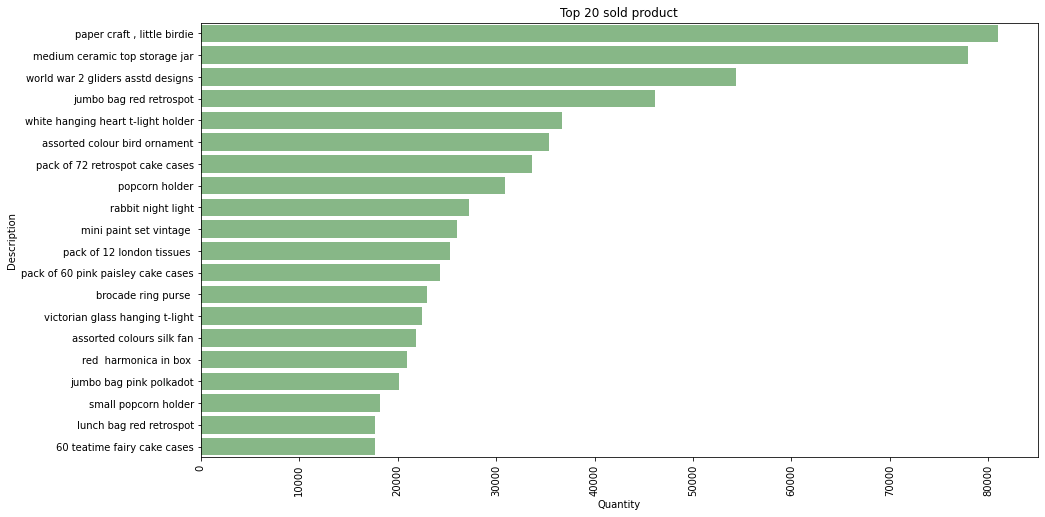

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,8))
sns.barplot(data=df_top20, y= 'Description', x= 'Quantity', color = 'green', alpha = .5)
plt.xticks(rotation = 'vertical')
plt.title('Top 20 sold product')

In [ ]:
#Top 20 products have the most Sale amount
top20_sale = df_new.groupby(by=['StockCode','Description'])['Amount'].sum().sort_values(ascending=False).iloc[:20]   
df_top20_sale= top20_sale.to_frame().reset_index()
df_top20_sale.head()

,StockCode,Description,Amount
0,23843,"paper craft , little birdie",168469.60
1,22423,regency cakestand 3 tier,142592.95
2,85123A,white hanging heart t-light holder,100448.15
3,85099B,jumbo bag red retrospot,85220.78
4,23166,medium ceramic top storage jar,81416.73


Text(0.5, 1.0, 'Top 20 Sale Amount')

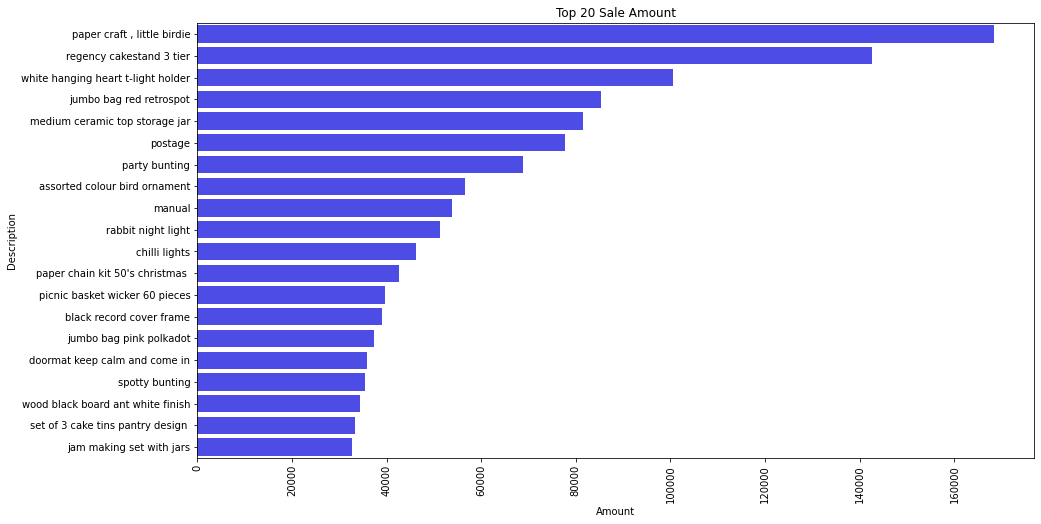

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(data=df_top20_sale, y= 'Description', x= 'Amount', color = 'blue', alpha = .8)
plt.xticks(rotation = 'vertical')
plt.title('Top 20 Sale Amount')

In [ ]:
order_by_country= df_new.groupby('Country').nunique()['InvoiceNo'].sort_values(ascending=False).reset_index()
order_by_country.head()

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98


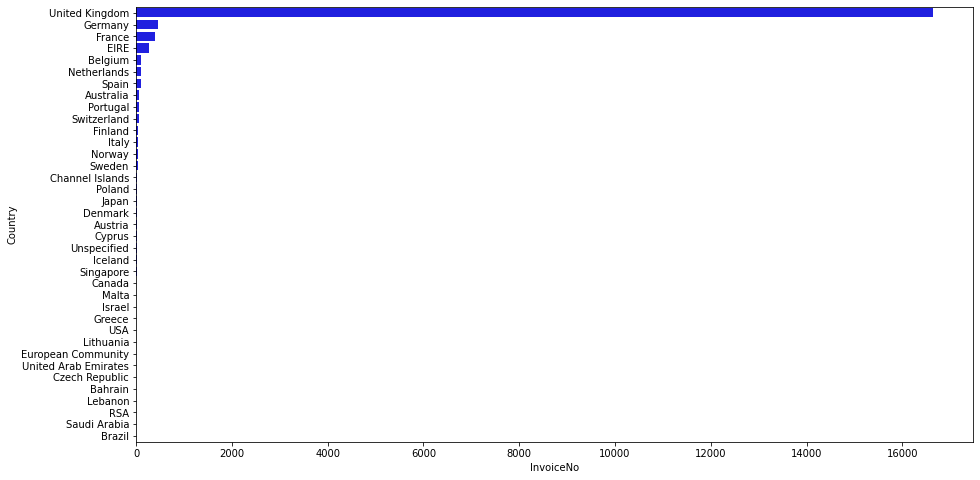

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(data=order_by_country, y= 'Country', x= 'InvoiceNo', color = 'blue')

This is about UK Ecommerce, so it is reasonable that Uk has the highest sold qty

In [ ]:
OrderNo_byMonth = df_new.groupby(['YearMonth']).nunique()['InvoiceNo'].reset_index().sort_index()
OrderNo_byMonth.head()

,YearMonth,InvoiceNo
0,201012,1400
1,201101,987
2,201102,998
3,201103,1321
4,201104,1149


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

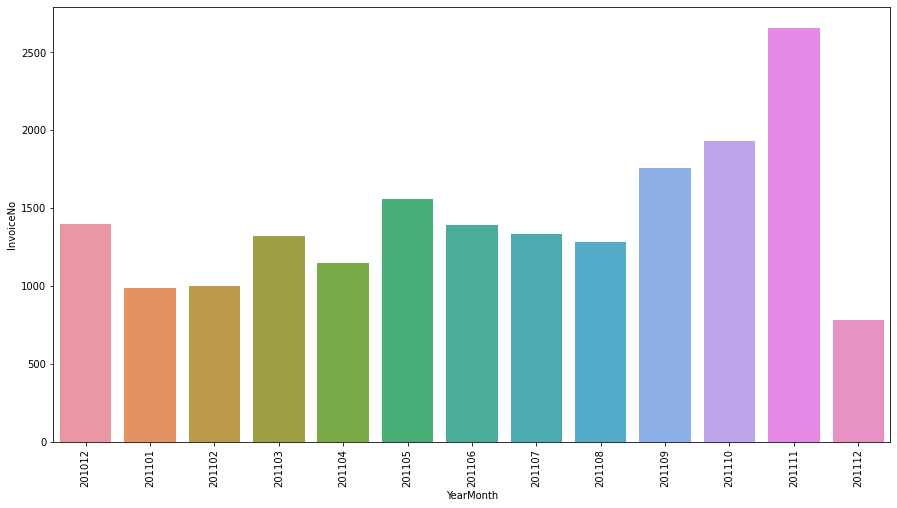

In [ ]:
plt.subplots(figsize=(15,8))
ax = sns.barplot(x='YearMonth', y = 'InvoiceNo', data = OrderNo_byMonth)
plt.xticks(rotation = 'vertical')

It clearly shows that Nov has the most number of orders. Dec 2011 drop a half order No. compared to Dec 2010

In [ ]:
OrderNo_byDay = df_new.groupby(['Day']).nunique()['InvoiceNo'].reset_index().sort_index()
OrderNo_byDay.head(10)

,Day,InvoiceNo
0,0,2863
1,1,3185
2,2,3455
3,3,4033
4,4,2831
5,6,2169


[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thur'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sun')]

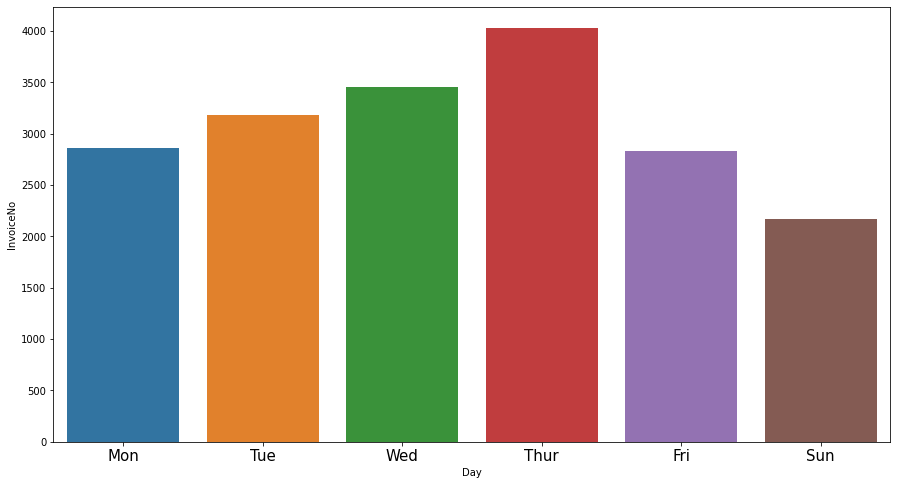

In [ ]:
plt.subplots(figsize=(15,8))
ax = sns.barplot(x='Day', y = 'InvoiceNo', data = OrderNo_byDay)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

We can see from this chart:
* No any orders on Saturday

* Thursday has the most order numbers

## **Check correlations between variables**

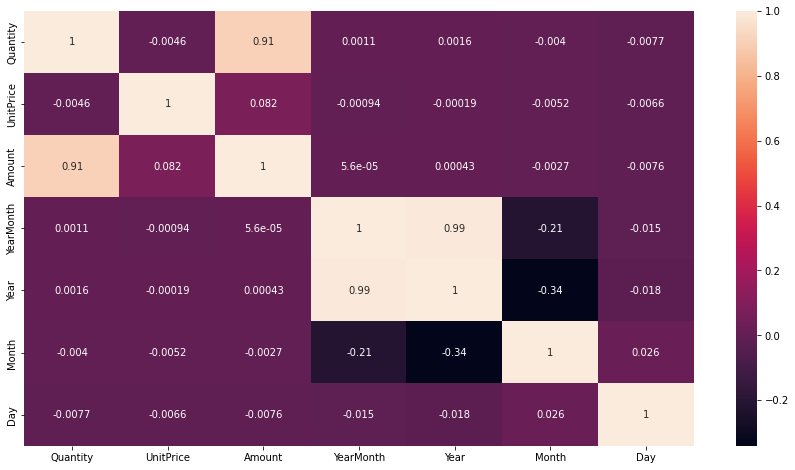

In [ ]:
plt.subplots(figsize=(15,8))
sns.heatmap(df_new.corr(), annot=True)

There is no clear correlation. Amount & quantity has corr = 0.91 but this is certain things as Amount = quantity * Unit price

# 4. Hypothesis testing

Except UK, Germany & Franch have the next highest sold product. We will test the amount spent of each order for customer in UK & Germany, germany & Franch to see the difference between them


In [ ]:
uk = df_new[df_new['Country']== 'United Kingdom']['Amount']
ger = df_new[df_new['Country']== 'Germany']['Amount']
fra = df_new[df_new['Country']== 'France']['Amount']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Hypothesis 1: UK vs Ger
# H0: UK = Ger
# H1: UK > Ger
ttest_ind(uk, ger, equal_var=False)

Ttest_indResult(statistic=-7.07276420939507, pvalue=1.5310822292975042e-12)

P-value << 0.05 -> reject H0 -> customers in UK spent  bigger amount than in Germany

In [ ]:
# Hypothesis 1: Ger vs Fra
# H0: Ger = Fra
# H1: Ger > Fra
ttest_ind(ger, fra, equal_var=False)

Ttest_indResult(statistic=0.2844721214837465, pvalue=0.7760536164315175)

P-value > 0.05 -> cannot reject H0 -> customers in Ger and France spent near similarity of amount for each order